# Linear Regression model

We will start with the linear regression model as a simple/fast algorithmic justice for comparison

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import copy
from sklearn.inspection import permutation_importance
from utils import *

### Load data 

In [2]:
load=np.load(r'../data/processed/No_normalized_data_V3.npz')
keys=load.files
X_train, y_train, X_test, y_test= [load[k] for k in keys[:4]]
colsx=load['colsx']
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1063574, 16), (1063574,), (267242, 16), (267242,))

### Model

In [4]:
First_time=False
# If the First_time = True, we will initialize the model, fit it, and saved it 
# Otherwise, we will just load the pretrained model 
if First_time:
    reg = LinearRegression().fit(X_train, y_train)
    joblib.dump(reg, "../models/LinReg/LinReg_V0.joblib")
    reg2=copy.copy(reg)
else: 
    reg2 = joblib.load("../models/LinReg/LinReg_V0.joblib")

### Prediction 

In [6]:
yh_train=reg2.predict(X_train)
yh_test=reg2.predict(X_test)

### Metrics and plot

**Train/Test set Metrics**

In [23]:
print ('_'*20,'\n','Train set')
print(local_metrics(y_train, yh_train))

print ('_'*20,'\n','Test set')
print(local_metrics(y_test, yh_test))

____________________ 
 Train set
{'r2_score': 0.8509728173767069, 'MSE': 52.41993356822764, 'RMSE': 7.240161156233171, 'NMSE': 0.013107461066154206}
____________________ 
 Test set
{'r2_score': 0.8409277832842572, 'MSE': 52.09309754904043, 'RMSE': 7.217554817875679, 'NMSE': 0.017792183457083922}


**Real vs prediciton plot**

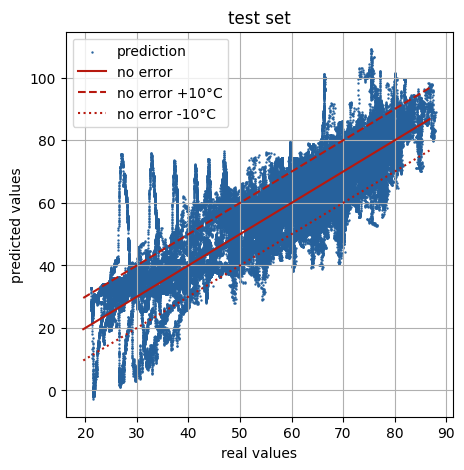

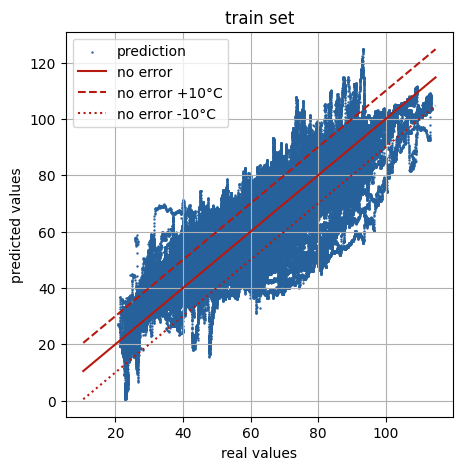

In [72]:
plot_prediction_real(y_train,yh_train,label='train set',offset=10,\
                     fig_size=(5,5))
plot_prediction_real(y_test,yh_test,label='test set',fig_size=(5,5))

**Time serie**

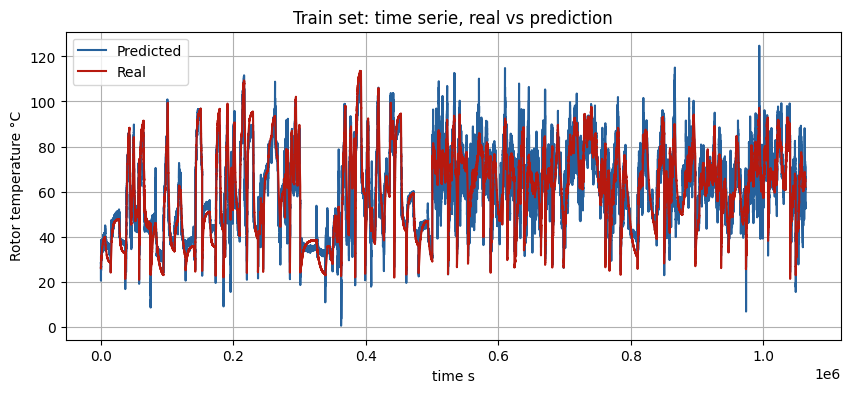

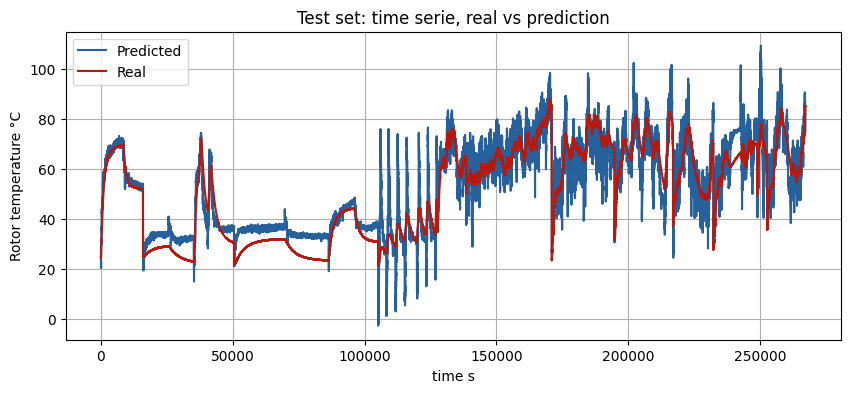

In [67]:
plot_y_yh_time(y_train,yh_train,title='Train set: time serie, real vs prediction',\
               fig_size=(10,4))
plot_y_yh_time(y_test,yh_test,title='Test set: time serie, real vs prediction',\
               fig_size=(10,4))

**Error histogram**

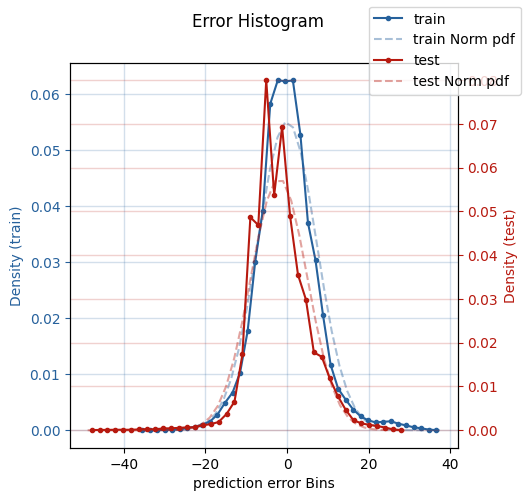

{'test': {'mean': -1.9822191989024145, 'std': 6.940021944961204}, 'train': {'mean': 4.4405223213114105e-14, 'std': 7.24016115623317}}


In [7]:
_=plot_error(y_train, yh_train, y_test, yh_test)

### Feature importances

Plot the features importance

In [12]:
P_I=permutation_importance(estimator=reg, X=X_train, y=y_train, 
                           scoring='r2', n_repeats=5, random_state=0)

In [13]:
means=P_I.importances_mean
std=P_I.importances_std

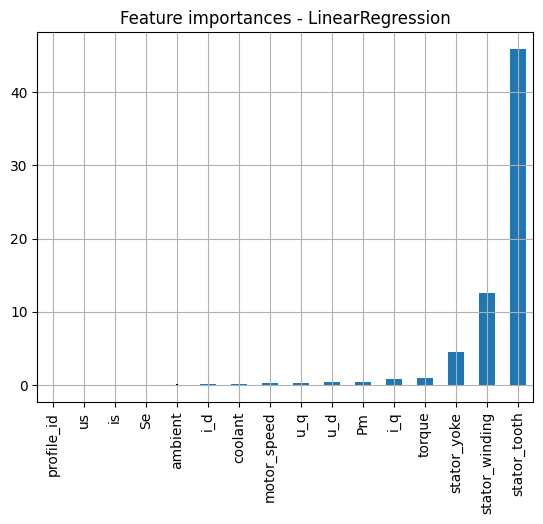

In [14]:
s=pd.Series(np.abs(means),index=colsx)
s=s.sort_values()
s.plot.bar(yerr=std)
plt.grid()
plt.title('Feature importances - LinearRegression')
plt.show()